In [1]:
import pandas as pd
import numpy as np

In [2]:
monte = pd.Series(['Graham Chapman', 'John Clesse', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [3]:
# Векторизованные операции над строками
monte.str.lower()   # Такие же как и обычные Python-функции, но работают быстрее и умеют обрабатывать пустые значения.

0    graham chapman
1       john clesse
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [4]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [5]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [6]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Clesse]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Методы использующие регулярные выражения

In [7]:
# Например поис непрерывной группы символов в начале каждого элемента
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [8]:
# Найти все элементы начинающиейся(^ - начало строки) и заканчивающиеся($ - конец строки) с согласной буквы
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### Векторизованный доступ к элементам и вырезание подстрок

In [9]:
monte.str[0:3] # Эквивалентно monte.str.slice(0, 3)


0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [10]:
monte.str.split().str[1]  # df.str[1] аналогично df.str.get(1)

0    Chapman
1     Clesse
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [11]:
full_monte = pd.DataFrame({'name': monte, 'info': ['2|3|4', '2|4', '1|3', '2|4', '2|3', '2|3|4']})
full_monte

,name,info
0,Graham Chapman,2|3|4
1,John Clesse,2|4
2,Terry Gilliam,1|3
3,Eric Idle,2|4
4,Terry Jones,2|3
5,Michael Palin,2|3|4


In [12]:
# Дает возможность быстро выделить и разбить столбец на все индикаторные переменные
full_monte['info'].str.get_dummies('|')

,1,2,3,4
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## Работа с временными рядами

In [13]:
# Стандартные пакеты Python для работы с датами. Гибкие, но плохо справляются с большими объемами данных.
from datetime import datetime

In [14]:
datetime(year=2018, month=7, day=3)

datetime.datetime(2018, 7, 3, 0, 0)

In [15]:
from dateutil import parser

In [16]:
date = parser.parse('04.05.1992', dayfirst=True)  # можно парсить разные формы дат
date

datetime.datetime(1992, 5, 4, 0, 0)

In [17]:
date.strftime('%A')       # %A - стандартный код форматирования строк, 
# о которых можно прочитать в разделе strftime в документации по пакету datetime

'Monday'

### Типизированные массивы времени в Numpy

In [18]:
date = np.array('2015-07-15', dtype=np.datetime64)
date

array('2015-07-15', dtype='datetime64[D]')

In [19]:
date + np.arange(12)  # Такие операции выполняются намного быстрее

array(['2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18',
       '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22',
       '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26'],
      dtype='datetime64[D]')

In [20]:
# Объект datetime64 ограничен точностью 64 бита, кодируемый им диапазон ограничен базовая_единица * 2^64
# Базовая единица времени определяется на основе входной информации
print(np.datetime64('2016-07-04'), '  -  дата/время на основе единицы в один день')
print()
print(np.datetime64('2015-07-04 12:01'), ' - дата/время на основе единицы в одну минуту')

2016-07-04   -  дата/время на основе единицы в один день

2015-07-04T12:01  - дата/время на основе единицы в одну минуту


### Даты и время в библиотеке Pandas

In [21]:
date = pd.to_datetime('4th of July, 2015')
print(date, date.month, date.day, sep='\n\n')

2015-07-04 00:00:00

7

4


In [22]:
date.strftime('%A')

'Saturday'

In [23]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

#### Индексация

In [24]:
index = pd.DatetimeIndex(['07-04-2014', '2014.08.04', '2015.09.05', '2015.10.05'], dayfirst=True)
index.day

Int64Index([7, 4, 5, 5], dtype='int64')

In [25]:
data = pd.Series([1, 2, 3, 4], index=index)
data

2014-04-07    1
2014-08-04    2
2015-09-05    3
2015-10-05    4
dtype: int64

In [26]:
data['2014-04-07': '2014-09-05']

2014-04-07    1
2014-08-04    2
dtype: int64

In [27]:
data['2014']

2014-04-07    1
2014-08-04    2
dtype: int64

### Структуры данных для временных рядов библиотеки Pandas

In [28]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [29]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [30]:
# Объект TimedeltaIndex создается при вычитании одной даты из другой
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Регулярные последовательности: функция pd.date_range()

In [31]:
# Кривая система дат в приоритете)
pd.date_range('01.01.2018', '01.07.2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [32]:
# Пока только так получается, задать нашу систему
pd.date_range(pd.to_datetime('01.01.2018', dayfirst=True), pd.to_datetime('07.01.2018', dayfirst=True))

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# Можно только начальную дату задавать и количество периодов
pd.date_range('01.01.2018', periods=8)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [34]:
# Также конечную
pd.date_range(end='01.08.2018', periods=8)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [35]:
# Также можно изменить интервал времени
pd.date_range('01.02.2018', periods=4, freq='3M')

DatetimeIndex(['2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31'], dtype='datetime64[ns]', freq='3M')

In [36]:
# Period !
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [37]:
# Timedelta !
pd.timedelta_range(0, periods=10, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00', '22:30:00'],
               dtype='timedelta64[ns]', freq='150T')

#### Год_Месяц

In [38]:
'{:02}'.format(3)

'03'

In [39]:
cal = pd.date_range('1715-01', '2015-06', freq='m')
cal.shape

calendar = ['{0}_{1:02}'.format(y, m) for y in cal.year for m in range(1, 13)]
calendar[:5]

['1715_01', '1715_02', '1715_03', '1715_04', '1715_05']

In [40]:
%timeit pd.to_datetime(calendar, format='%Y_%m').to_period('m')


186 ms ± 3.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:

%timeit pd.to_datetime(pd.Index(calendar).str.replace('_', '-')).to_period('m')

66 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Временные сдвиги и окна

In [42]:
data = pd.read_excel('Хранение по дням.xlsx')
data.head()

,Дата,м3,себ,Ассортимент
0,2014-10-01 00:00:00.000,82888.118095,3.562200e+09,122835
1,2014-10-02 00:00:00.000,82775.833383,3.567721e+09,123103
2,2014-10-03 00:00:00.000,82280.742518,3.570863e+09,122881
3,2014-10-06 00:00:00.000,81608.524134,3.540350e+09,123142
4,2014-10-07 00:00:00.000,81325.107466,3.537362e+09,123945


In [43]:
data = pd.DataFrame({'Себ млн': data['себ'] / 1000000, 'Дата': pd.to_datetime(data['Дата'])})
data.set_index(['Дата'], inplace=True)
data

,Себ млн
Дата,
2014-10-01,3562.200024
2014-10-02,3567.721409
2014-10-03,3570.863315
2014-10-06,3540.350175
2014-10-07,3537.362404
2014-10-08,3500.822595
2014-10-09,3500.845505
2014-10-10,3461.360945
2014-10-13,3511.722665


In [44]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

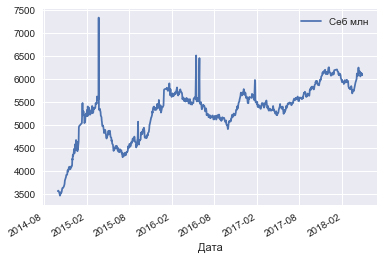

In [45]:
data.plot()

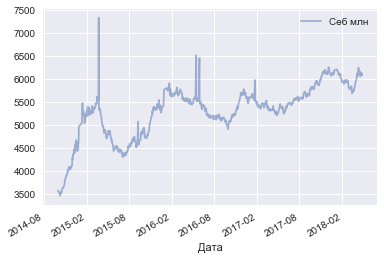

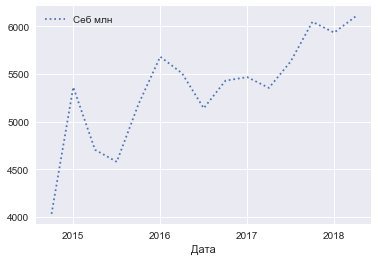

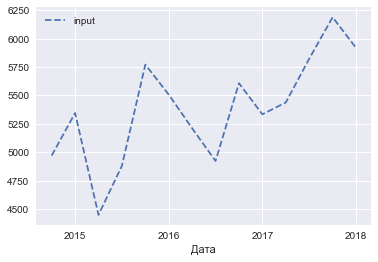

In [46]:
# При работе с временными рядами, часто бывает необходимо переразбить их с использованием других интервалов.
# Для этого есть два метода resample() или гораздо более простой asfreq()
data.plot(alpha=0.5, style='-')
data.resample('BQ').mean().plot(style=':')    # За период выбрано значение квартала
data.asfreq('BQ').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');
# В каждой точке resample выдает среднее значение за период, а asfreq значение на конец периода

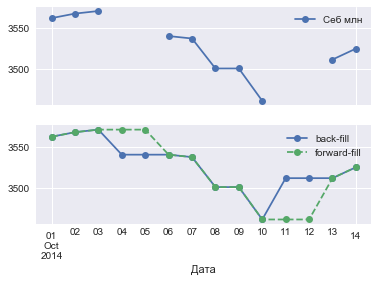

In [47]:
# В случае повышающей дискретизации методы resample и asfreq, почти идентичны.
# разве что у resample доступных для использования параметров гораздо больше
# оба эти метода по умолчанию оставляют значения интерполированных точек пустыми.
# Например если наши данные, только по рабочим дням, передискредизируем с периодичностью обычного дня

fig, ax = plt.subplots(2, sharex=True)
datatw = data.iloc[:10]

datatw.asfreq('D').plot(ax=ax[0], marker='o') # то по умолчанию получаться пробелы в выходные дни
# Но мы можем задать метод заполнения
datatw.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') # bfill - интерполяция назад по последующему значению
datatw.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') # ffill - интерполяция вперед по предыдущему значению
ax[1].legend(['back-fill', 'forward-fill']);

#### Временные сдвиги

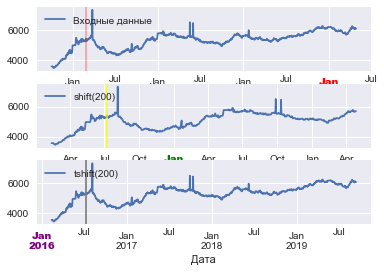

In [48]:
# для сдвига данных во времени используются два метода shift() и tshift()

fig, ax = plt.subplots(3, sharey=True) 

databd = data.asfreq('D', method='pad')

databd.plot(ax=ax[0])
databd.shift(500).plot(ax=ax[1])  # Метода shift() сдвигает данные на 500 дн., перемещая часть из них за пределы графика
databd.tshift(500).plot(ax=ax[2]) # tshift() свдигает только индекс на 500 дн.

# Легенды и пояснения
local_max = pd.to_datetime('2015-02-25')
offset = pd.Timedelta(500, 'D')

ax[0].legend(['Входные данные'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(200)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='green')
ax[1].axvline(local_max + offset, alpha=0.8, color='yellow')

ax[2].legend(['tshift(200)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='purple')
ax[2].axvline(local_max + offset, alpha=1, color='gray');

Text(0,0.5,'% Прироста запаса по себ за год')

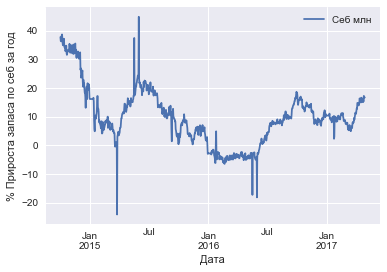

In [49]:
# такую разновидность сдвигов часто используют для вычислений измененией за период времени
# Например можно расчитать на сколько прирастает запас на складе в себ за год
ROI = 100 * (databd.tshift(-365) / databd - 1 )  # получается текущий год делится на предыдущий из-за сдвига индекса
ROI.plot()
plt.ylabel('% Прироста запаса по себ за год')

#### Скользящие окна

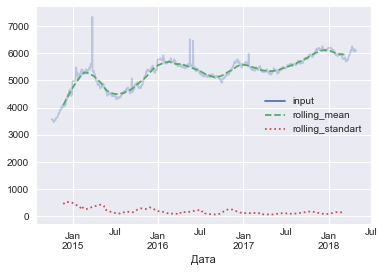

In [63]:
# атрибут rolling() объектов DataFrame и Series 
# возвращает представление, которое предоставляет несколько операций агрегирования
rolling = databd.rolling(100, center=True)

my_data = pd.DataFrame({'input': databd['Себ млн'],
                        'rolling_mean': rolling['Себ млн'].mean(),      
                        'rolling_standart': rolling['Себ млн'].std()})

ax = my_data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)
# Как и в случае groupby можно использовать методы aggregate() и apply()

In [64]:
# Больше про Временные ряды в разделе Time Series|Date документации Pandas

## Велосипеды на Фримонтском мосту

In [65]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [66]:
# Для удобства сократим навзания столбцов
data.columns = ['West', 'East']
# И добавим столбец Итога
data['Total'] = data.eval('West + East')

data.dropna().describe()

,West,East,Total
count,51063.000000,51063.000000,51063.000000
mean,53.654329,57.126902,110.781231
std,70.067851,82.685731,139.511157
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,71.000000,70.000000,145.000000
max,698.000000,717.000000,957.000000


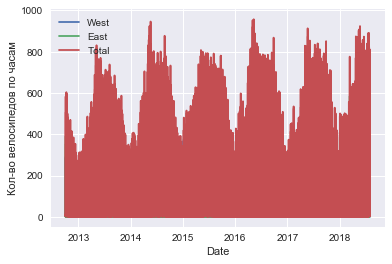

In [70]:
data.plot()
plt.ylabel('Кол-во велосипедов по часам'); # 

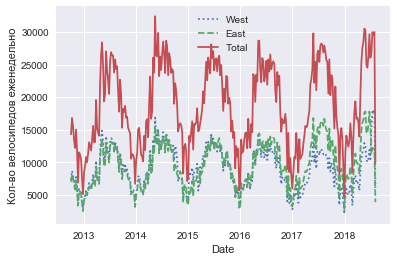

In [71]:
# по часам трудно что-то понять, поэтому выполним передискрезитацию с шагом неделя.
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Кол-во велосипедов еженедельно');

Text(0,0.5,'Среднее количество по часам')

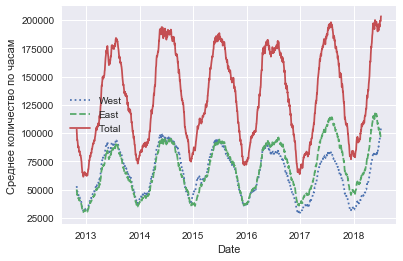

In [77]:
# Еще один способ агрегирования данных - вычисление скользящего среднего
daily = data.resample('D').sum()
# Вычисляем скользящее среднее за 50 дней, центрируя окно.
daily.rolling(50, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Среднее количество по часам')

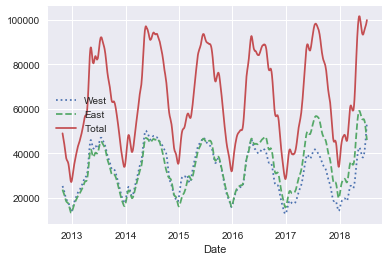

In [75]:
# Причина зубчастости получившегося изображения - в резкой границе окна.
# Более гладкую версию скользящего среднего можно получить, воспользовавшись оконной функцией, 
# например Гаусовым окном.
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);
# Задаем величину гаусовой функции внутри окна в 10 дней

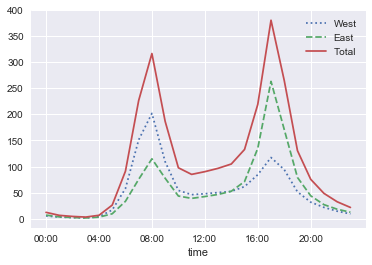

In [86]:
# Усредненное движение велосипедного транспорта в течение суток

by_time = data.groupby(data.index.time).mean()  
hourly_ticks = 4 * 60 * 60 * np.arange(6) # по x выводим четырех часовой интервал
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

# Явное бимодальное распределение с максимумами в 8:00 и 17:00
# Существенный вклад маятниковой миграции через мост.

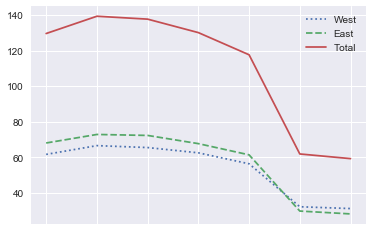

In [91]:
# Распределение по дням недели
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"]
by_weekday.plot(style=[':', '--', '-'])

In [93]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()


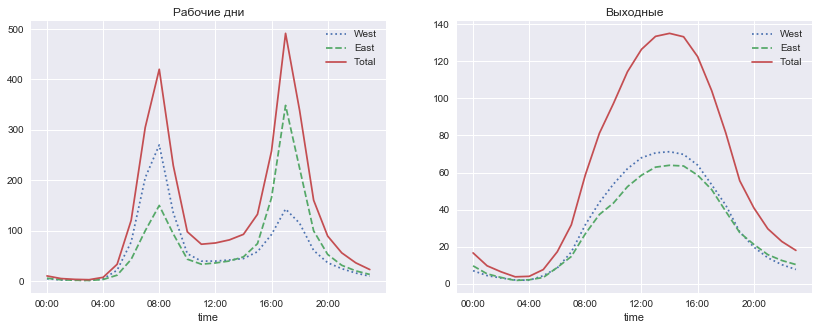

In [97]:
# Распределение по часам с разделением на выходные/рабочие дни
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Рабочие дни', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Выходные', xticks=hourly_ticks, style=[':', '--', '-'])